In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%precision 3

'%.3f'

In [2]:
from scipy import integrate # 적분
import warnings

warnings.filterwarnings('ignore', category = integrate.IntegrationWarning)

# 1. 1차원 연속형 확률변수

## 1-1. 정의

### 확률밀도함수
$ P(x_0 \le X \le x_1) = \int_{x_0}^{x_1}f(x)dx$

In [3]:
x_range = np.array([0, 1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

X = [x_range, f]

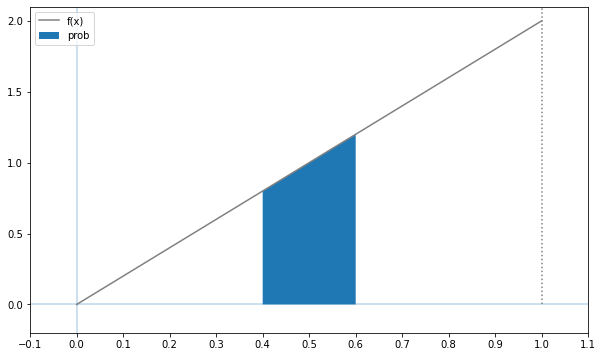

In [4]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color = 'gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyle = ':', color='gray')

xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

#### scipy 적분

In [5]:
# integrate.quad(f, x0, x1)
integrate.quad(f, 0.4, 0.6) # 반환되는 첫번째 값이 적분값(확률)

(0.200, 0.000)

#### 연속 확률 함수 성질
1. 항상 양수이다.
2. -무한대 ~ +무한대 범위 적분값이 1이다

In [6]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [7]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

### 누적분포함수
$ F(x) = P(X \le x) = \int_{-\infty}^{x}f(x)dx$

In [8]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

# P(0.4 <= X <= 0.6)
# integrate.quad(f, 0.4, 0.6)
F(0.6)-F(0.4)

0.200

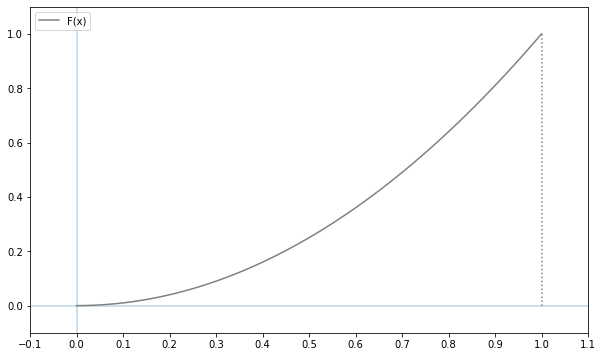

In [11]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyle = ':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left')

plt.show()

### 확률변수의 변환  
$2X+3 = Y$

In [12]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0

def G(y):
    return integrate.quad(g, -np.inf, y)[0]

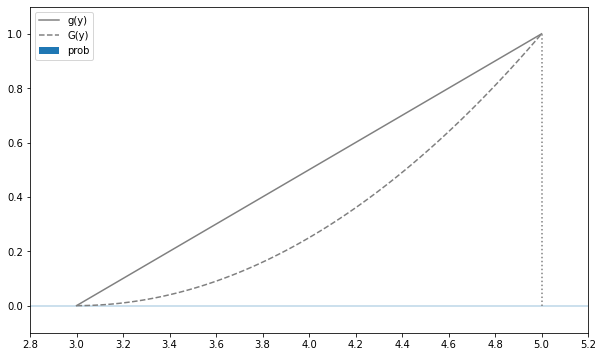

In [13]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color = 'gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color = 'gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyle = ':', color='gray')

xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

## 1-2. 지표

### 기댓값
$ \mu = E(X) = \int_{-\infty}^{\infty}xf(x)$

In [14]:
def integrand(x):
    return x*f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [16]:
def E(X, g=lambda x:x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X, g=lambda x: 2*x+3)

4.333

In [17]:
2*E(X) + 3

4.333

### 분산
$\sigma^2 = V(X) = \int_{-\infty}^{\infty}(x-\mu)^2f(x)dx$

In [18]:
mean = E(X)
def integrand(x):
    return (x-mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [20]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)

V(X, g=lambda x:2*x + 3)[0]

0.222

# 2. 2차원 연속형 확률변수

## 2-1. 정의

### 결합확률밀도함수
$(X, Y)$의 정의역 $\{(x,y)|a\le x \le b;c\le y \le d\}$에 대하여  
$P(x_0 \le X \le x_1, y_0 \le Y \le y_1) = \int_{x_0}^{x_1} \int_{y_0}^{y_1}f(x,y)dxdy$

불공정 룰렛 A, B를 돌려 나온 값을 더한 것을 X, B의 값을 Y라 했을 때  
$ \{0 \le X \le 2, 0 \le Y \le 1\}, \\
f(x,y) = \begin{cases} 4y(x-y) & (0 \le y \le 1 \ 및 \ 0 \le x-y \le 1) \\ 0 & (otherwise) \end{cases}$

In [27]:
x_range = [0, 2]
y_range = [0, 1]

def f_xy(x,y):
    if 0<=y<=1 and 0<=x-y<=1:
        return 4*y*(x-y)
    else:
        return 0

XY = [x_range, y_range, f_xy]

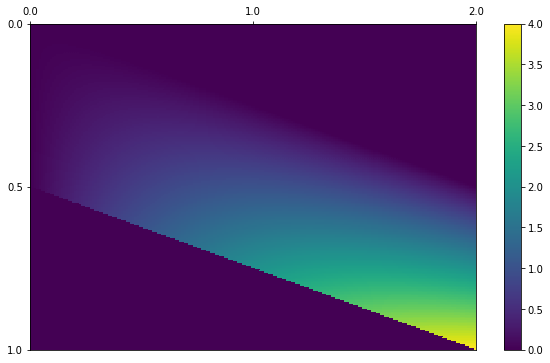

In [28]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

#### scipy 다중적분

In [29]:
# integrate.nquad(f_xy, [[x0, x1], [y0, y1]])
integrate.nquad(f_xy, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

1.000

### 주변확률밀도함수
$ f_X(x)=\int _{-\infty}^{\infty}f(x,y)dy$  
`partial(f_xy, x)` : 함수 `f_xy`의 인수 `x, y`중 `x`가 고정되고 인수가 `y`만으로 된 함수 반환

In [30]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

X = [x_range, f_X]
Y = [y_range, f_Y]

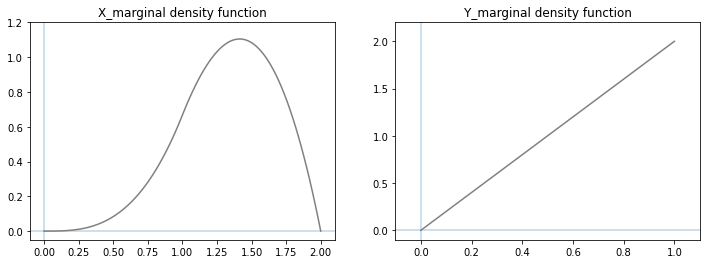

In [47]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.vlines(0, -0.2, 1.3, alpha=0.3)
ax1.hlines(0, -0.2, 2.3, alpha=0.3)
ax2.vlines(0, -0.1, 2.3, alpha=0.3)
ax2.hlines(0, -0.1, 2.1, alpha=0.3)
ax1.set_xlim(-0.1, 2.1)
ax1.set_ylim(-0.05, 1.2)
ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(-0.1, 2.2)
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

## 2-2. 지표

### 기댓값

In [48]:
def integrand(x,y):
    return x*f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

1.333

In [49]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y) * f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

mean_X = E(XY, lambda x,y : x)
mean_Y = E(XY, lambda x,y : y)
mean_X, mean_Y

(1.333, 0.667)

In [50]:
a, b = 2, 3
E(XY, lambda x, y : a*x + b*y)

4.667

### 분산

In [51]:
def integrand(x, y):
    return (x-mean_X)**2 * f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

0.111

In [52]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y)-mean)**2 * f_xy(x, y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

var_X = V(XY, lambda x, y:x)
var_Y = V(XY, lambda x, y:y)
var_X, var_Y

(0.111, 0.056)

### 공분산
$ \sigma_{XY}=Cov(X,Y)=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}(x-\mu_X)(y-\mu_Y)f(x,y)dxdy$

In [53]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    def integrand(x, y):
        return (x-mean_X)*(y-mean_Y)*f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

cov_xy = Cov(XY)
cov_xy

0.056

$ V(2X+3Y) = 4V(X)+9V(Y)+12Cov(X,Y)$

In [54]:
V(XY, lambda x, y:2*x+3*y)

1.611

In [55]:
2**2*var_X + 3**2*var_Y + 2*2*3*cov_xy

1.611

### 상관계수

In [56]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071117041227913